##Importing libraries

#OBP Implementation

In [20]:
from sklearn.utils import shuffle
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

class Perceptron():
  # Using data

  def __init__(self, data): # special method
    self.data = data
    self.X = data.data
    self.Y= data.target
    self.Feature = data.feature_names
    self.df = pd.DataFrame(data=self.X, columns=self.Feature)
    self.train = 0
    self.test = 0
    self.df['Target'] = self.Y
  
  def Rand(self, size):
    _Rand = np.random.rand(size)
    return _Rand

  def Sigmoid(self, _input):
      _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
      return _Sigmoid

  def tanh(self, _input):
      return np.tanh(_input)

  def ReLU(self, _input):
      if _input < 0:
          return 0
      else:
          return 0.01 * _input
      
  def O(self, feature, weight, fcn):
      if fcn == 'sigmoid':
          return self.Sigmoid(np.dot(feature, weight))
      elif fcn == 'tanh':
          return self.tanh(np.dot(feature, weight))
      elif fcn == 'ReLU':
          return self.ReLU(np.dot(feature, weight))
      else:
          return -1
    
  def hyperparameter(self, _learning_rate=0.1, _E_max=1e6, _epoch=50):
    self.w = self.Rand(self.X.shape[1])
    self.learning_rate = _learning_rate
    self.E_max = _E_max
    self.epoch = _epoch

  def normalize_shuffle(self, _a, _frac = 0):

    scaler = preprocessing.MinMaxScaler()
    a = pd.DataFrame(data=self.data.data, )
    names = a.columns
    d = scaler.fit_transform(a)
    a = pd.DataFrame(d, columns=self.data.feature_names)

    # if _frac != 0:
    #   a = a.sample(frac=_frac).reset_index(drop=True)

    return a

  def shuffle(self, _a, _frac):
    a = _a.sample(frac=_frac).reset_index(drop=True)
    return a


  def train(self, type="full", b=False, train_frac="0.8", shuffled=False, normalize=False, act_func="sigmoid"):

    scaled_df = shuffle(self.df, 1.)

    if type == "full" and b == False:
      n_learning = int(self.X.shape[0])
      print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type != "full" and b == False:

      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])
      # print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type == "full" and b == True:

      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = self.O(self.df.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.df.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst_learn)

    if type != "full" and b == True:
      
      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])

      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = O(self.train.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.train.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,epoch+1,1)
      plt.plot(iteration, e_lst_learn)



##Script

In [21]:
# a = Perceptron(load_breast_cancer()).hyperparameter(0.1,1e6, 50)
# a.train()


#Functional Implementation

In [39]:
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


## Loading X, Y from load_breast_cancer() class

In [40]:
# Using data

data = load_breast_cancer()
X = data.data
Y = data.target

Feature = data.feature_names
df = pd.DataFrame(data=X, columns=Feature)
df['Target'] = Y

df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  Target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

##Functions

In [41]:
# Functions

def Rand(size):
    _Rand = np.random.rand(size)
    return _Rand

def Sigmoid(_input):
    _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
    return _Sigmoid

def tanh(_input):
    return np.tanh(_input)

def ReLU(_input):
    if _input < 0:
        return 0
    else:
        return 0.01 * _input
    
def O(feature, weight, fcn):
    if fcn == 'sigmoid':
        return Sigmoid(np.dot(feature, weight))
    elif fcn == 'tanh':
        return tanh(np.dot(feature, weight))
    elif fcn == 'ReLU':
        return ReLU(np.dot(feature, weight))
    else:
        return -1



##Hyper Parameters

In [42]:
# Hyper_params

w = Rand(X.shape[1])
print(w)
learning_rate = 10
E_max = 1e6
E = 0
epoch = 50

[0.62983042 0.03737558 0.57885683 0.3970701  0.23822688 0.92012626
 0.36300923 0.82670606 0.61015046 0.62864243 0.78865815 0.93373408
 0.87749627 0.65648757 0.060701   0.85118583 0.53384616 0.75704113
 0.15212207 0.66122862 0.42165294 0.35004771 0.4498188  0.40499729
 0.79495944 0.45264044 0.2615765  0.67934924 0.81160835 0.23903831]


##Without being shuffled and normalized

In [43]:
n_learning = int(np.round(X.shape[0] * 1))

569
epoch_1 - input_1: 0.5
epoch_1 - input_2: 1.0
epoch_1 - input_3: 1.5
epoch_1 - input_4: 2.0
epoch_1 - input_5: 2.5
epoch_1 - input_6: 3.0
epoch_1 - input_7: 3.5
epoch_1 - input_8: 4.0
epoch_1 - input_9: 4.5
epoch_1 - input_10: 5.0
epoch_1 - input_11: 5.5
epoch_1 - input_12: 6.0
epoch_1 - input_13: 6.5
epoch_1 - input_14: 7.0
epoch_1 - input_15: 7.5
epoch_1 - input_16: 8.0
epoch_1 - input_17: 8.5
epoch_1 - input_18: 9.0
epoch_1 - input_19: 9.5
epoch_1 - input_20: 9.5
epoch_1 - input_21: 9.5
epoch_1 - input_22: 9.5
epoch_1 - input_23: 10.0
epoch_1 - input_24: 10.5
epoch_1 - input_25: 11.0
epoch_1 - input_26: 11.5
epoch_1 - input_27: 12.0
epoch_1 - input_28: 12.5
epoch_1 - input_29: 13.0
epoch_1 - input_30: 13.5
epoch_1 - input_31: 14.0
epoch_1 - input_32: 14.5
epoch_1 - input_33: 15.0
epoch_1 - input_34: 15.5
epoch_1 - input_35: 16.0
epoch_1 - input_36: 16.5
epoch_1 - input_37: 17.0
epoch_1 - input_38: 17.0
epoch_1 - input_39: 17.5
epoch_1 - input_40: 18.0
epoch_1 - input_41: 18.5
ep

epoch_26 - input_20: 9.5
epoch_26 - input_21: 9.5
epoch_26 - input_22: 9.5
epoch_26 - input_23: 10.0
epoch_26 - input_24: 10.5
epoch_26 - input_25: 11.0
epoch_26 - input_26: 11.5
epoch_26 - input_27: 12.0
epoch_26 - input_28: 12.5
epoch_26 - input_29: 13.0
epoch_26 - input_30: 13.5
epoch_26 - input_31: 14.0
epoch_26 - input_32: 14.5
epoch_26 - input_33: 15.0
epoch_26 - input_34: 15.5
epoch_26 - input_35: 16.0
epoch_26 - input_36: 16.5
epoch_26 - input_37: 17.0
epoch_26 - input_38: 17.0
epoch_26 - input_39: 17.5
epoch_26 - input_40: 18.0
epoch_26 - input_41: 18.5
epoch_26 - input_42: 19.0
epoch_26 - input_43: 19.5
epoch_26 - input_44: 20.0
epoch_26 - input_45: 20.5
epoch_26 - input_46: 21.0
epoch_26 - input_47: 21.0
epoch_26 - input_48: 21.5
epoch_26 - input_49: 21.5
epoch_26 - input_50: 21.5
epoch_26 - input_51: 21.5
epoch_26 - input_52: 21.5
epoch_26 - input_53: 21.5
epoch_26 - input_54: 22.0
epoch_26 - input_55: 22.5
epoch_26 - input_56: 22.5
epoch_26 - input_57: 23.0
epoch_26 - inpu

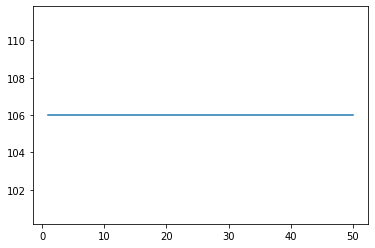

In [44]:

print(n_learning)
e_lst = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(X[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * X[i])
        E += (0.5 * (Y[i] - o) ** 2)
        # print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
        if(E > E_max):
            break
    # e_lst.append(E / n_learning)
    e_lst.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst)

## Normalizing

In [45]:
# normalizing

scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(X)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=data.feature_names)
scaled_df.head()



mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   
4                0.186816  ...      0.519744       0.123934         0.506948   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 30 columns]

 ## shuffling and reseting indexes

In [46]:
scaled_df = scaled_df.sample(frac=1.).reset_index(drop=True)
scaled_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.315159      0.199188        0.301223   0.183160         0.375553   
1     0.196365      0.430504        0.191417   0.099639         0.388463   
2     0.415022      0.321610        0.437496   0.260912         0.647016   
3     0.260732      0.241461        0.244627   0.143415         0.293220   
4     0.370060      0.268854        0.359961   0.225366         0.353525   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.143918        0.110239             0.185437       0.331818   
1          0.191890        0.113027             0.112177       0.489899   
2          0.665665        0.682755             0.617296       0.664141   
3          0.058156        0.010480             0.031923       0.078283   
4          0.213238        0.095337             0.112326       0.420707   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.139848  ...      0.246176       0.187367         0.217640   
1                0.327717  ...      0.145500       0.432836         0.136411   
2                0.549073  ...      0.335468       0.323827         0.343593   
3                0.142586  ...      0.192458       0.204957         0.169680   
4                0.187447  ...      0.302383       0.285714         0.276358   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.122444          0.373968           0.098777         0.122444   
1    0.061787          0.247837           0.146414         0.124920   
2    0.179439          0.553589           0.463089         0.548882   
3    0.088232          0.259064           0.021577         0.015479   
4    0.158351          0.339629           0.156019         0.164537   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.316907        0.190223                 0.065985  
1              0.220378        0.316184                 0.165814  
2              0.733677        0.528287                 0.327693  
3              0.095670        0.069387                 0.043946  
4              0.285498        0.401143                 0.116818  

[5 rows x 30 columns]

##Train & Test parameter assignment

In [47]:
train = scaled_df.sample(frac = 0.8).reset_index(drop=True)
test = scaled_df.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()


(455, 30) (114, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.379052      0.523842        0.357612   0.235546         0.372303   
1     0.573572      0.560703        0.589524   0.419300         0.621739   
2     0.310426      0.157254        0.301776   0.179343         0.407692   
3     0.185480      0.109909        0.172068   0.094719         0.203304   
4     0.154716      0.218803        0.157073   0.076649         0.482712   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.097939        0.056186             0.144085       0.255051   
1          0.489909        0.453843             0.730119       0.289899   
2          0.189896        0.156139             0.237624       0.416667   
3          0.054598        0.007240             0.032744       0.192929   
4          0.281332        0.157591             0.197068       0.344949   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.106992  ...      0.251156       0.351279         0.224762   
1                0.469250  ...      0.441124       0.551706         0.452662   
2                0.162174  ...      0.255425       0.192964         0.245480   
3                0.157329  ...      0.157595       0.164712         0.137756   
4                0.480834  ...      0.119175       0.228945         0.105185   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.126229          0.149904           0.023304         0.019153   
1    0.273496          0.449250           0.246830         0.194249   
2    0.129276          0.480948           0.145540         0.190895   
3    0.069996          0.303308           0.053992         0.014808   
4    0.050433          0.455854           0.202491         0.151597   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.099622        0.000000                 0.000000  
1              0.632646        0.147053                 0.242621  
2              0.442612        0.278336                 0.115112  
3              0.135842        0.231224                 0.143054  
4              0.334845        0.205598                 0.275351  

[5 rows x 30 columns]

##Training with all data

epoch_1 - input_1: 0.3856622871717471
epoch_1 - input_2: 0.6564546712893611
epoch_1 - input_3: 0.671671142187565
epoch_1 - input_4: 0.7119879234361876
epoch_1 - input_5: 0.7474667359763114
epoch_1 - input_6: 0.9271680169536047
epoch_1 - input_7: 1.3582349314210402
epoch_1 - input_8: 1.4555878804294862
epoch_1 - input_9: 1.890001444411487
epoch_1 - input_10: 1.937720002152822
epoch_1 - input_11: 2.362355450250895
epoch_1 - input_12: 2.365584591385152
epoch_1 - input_13: 2.37830334662982
epoch_1 - input_14: 2.460509456913986
epoch_1 - input_15: 2.7789063536248824
epoch_1 - input_16: 2.7995268263109647
epoch_1 - input_17: 3.0168856245960227
epoch_1 - input_18: 3.2319218492167416
epoch_1 - input_19: 3.303135798107681
epoch_1 - input_20: 4.280599104137457
epoch_1 - input_21: 4.280599625109667
epoch_1 - input_22: 4.280599625836955
epoch_1 - input_23: 4.780595173428144
epoch_1 - input_24: 5.280594318519241
epoch_1 - input_25: 5.780569197459529
epoch_1 - input_26: 6.280357827955869
epoch_1 - i

epoch_6 - input_1: 0.49915391355066896
epoch_6 - input_2: 0.999003459317358
epoch_6 - input_3: 1.499003442651067
epoch_6 - input_4: 1.9827717354968128
epoch_6 - input_5: 2.482479326975851
epoch_6 - input_6: 2.977717400628348
epoch_6 - input_7: 3.4777173899824736
epoch_6 - input_8: 3.977396272681508
epoch_6 - input_9: 4.477396224528908
epoch_6 - input_10: 4.975283546501922
epoch_6 - input_11: 5.475282721985183
epoch_6 - input_12: 5.9745450504216695
epoch_6 - input_13: 6.472539182531193
epoch_6 - input_14: 6.972523553408679
epoch_6 - input_15: 7.472351466310916
epoch_6 - input_16: 7.970263075425315
epoch_6 - input_17: 8.4701022106233
epoch_6 - input_18: 8.96999459300599
epoch_6 - input_19: 9.467314994018261
epoch_6 - input_20: 9.4673149943209
epoch_6 - input_21: 9.467315094328162
epoch_6 - input_22: 9.467315094328281
epoch_6 - input_23: 9.967315003049944
epoch_6 - input_24: 10.467314955219233
epoch_6 - input_25: 10.967314055599408
epoch_6 - input_26: 11.467252378155207
epoch_6 - input_27

epoch_7 - input_55: 18.37228014823429
epoch_7 - input_56: 18.372318723300207
epoch_7 - input_57: 18.830412020259622
epoch_7 - input_58: 18.84692202702573
epoch_7 - input_59: 18.854302976007585
epoch_7 - input_60: 18.877620644555964
epoch_7 - input_61: 19.55619139268231
epoch_7 - input_62: 19.556191484226144
epoch_7 - input_63: 20.054884598527636
epoch_7 - input_64: 20.05488461407455
epoch_7 - input_65: 20.554815956263262
epoch_7 - input_66: 21.00860661829276
epoch_7 - input_67: 21.008613654878715
epoch_7 - input_68: 21.008619944281218
epoch_7 - input_69: 21.00862402254256
epoch_7 - input_70: 21.008624022590038
epoch_7 - input_71: 21.508622552400357
epoch_7 - input_72: 21.508622557392716
epoch_7 - input_73: 22.002138567532
epoch_7 - input_74: 22.502114844262888
epoch_7 - input_75: 22.502115960112626
epoch_7 - input_76: 22.936890010081516
epoch_7 - input_77: 22.9368944944319
epoch_7 - input_78: 23.42595469146367
epoch_7 - input_79: 23.919708261353843
epoch_7 - input_80: 23.91970912924992

epoch_8 - input_371: 78.68582993394467
epoch_8 - input_372: 78.68582993398088
epoch_8 - input_373: 79.17403039772341
epoch_8 - input_374: 79.67398956807634
epoch_8 - input_375: 79.67398956807635
epoch_8 - input_376: 79.67400263558066
epoch_8 - input_377: 79.67400263558066
epoch_8 - input_378: 79.67401828667606
epoch_8 - input_379: 79.67401828667786
epoch_8 - input_380: 80.17401668175336
epoch_8 - input_381: 80.17401725377222
epoch_8 - input_382: 80.17401726928297
epoch_8 - input_383: 80.17401727106586
epoch_8 - input_384: 80.17401852217826
epoch_8 - input_385: 80.17402678301077
epoch_8 - input_386: 80.67394228343855
epoch_8 - input_387: 80.67394228343855
epoch_8 - input_388: 80.67394228343856
epoch_8 - input_389: 80.67394228343856
epoch_8 - input_390: 81.17394228147357
epoch_8 - input_391: 81.17394228147357
epoch_8 - input_392: 81.17394228232558
epoch_8 - input_393: 81.67326273947128
epoch_8 - input_394: 82.17248164117842
epoch_8 - input_395: 82.17248164117842
epoch_8 - input_396: 82.1

epoch_12 - input_403: 85.70625348958612
epoch_12 - input_404: 85.70625349238429
epoch_12 - input_405: 85.70625349238456
epoch_12 - input_406: 85.70625349259193
epoch_12 - input_407: 85.71012871557848
epoch_12 - input_408: 85.71012872161627
epoch_12 - input_409: 86.20975903155922
epoch_12 - input_410: 86.20975903156759
epoch_12 - input_411: 86.20975903156759
epoch_12 - input_412: 86.20975903279574
epoch_12 - input_413: 86.20975903279574
epoch_12 - input_414: 86.20975903279574
epoch_12 - input_415: 86.70971996944932
epoch_12 - input_416: 86.70972010264259
epoch_12 - input_417: 86.70982671015231
epoch_12 - input_418: 87.20982657719739
epoch_12 - input_419: 87.20982657919114
epoch_12 - input_420: 87.20982657919114
epoch_12 - input_421: 87.20982754505314
epoch_12 - input_422: 87.20982754505314
epoch_12 - input_423: 87.20982754505314
epoch_12 - input_424: 87.20982754505314
epoch_12 - input_425: 87.20982754642316
epoch_12 - input_426: 87.20982754642316
epoch_12 - input_427: 87.20982754642316


epoch_14 - input_72: 23.983489536101242
epoch_14 - input_73: 24.47625747257479
epoch_14 - input_74: 24.97625502130287
epoch_14 - input_75: 24.976299202918653
epoch_14 - input_76: 25.2836152274617
epoch_14 - input_77: 25.283658253615858
epoch_14 - input_78: 25.575468831878638
epoch_14 - input_79: 25.592398605052782
epoch_14 - input_80: 25.592399339824308
epoch_14 - input_81: 25.592399350355727
epoch_14 - input_82: 25.5923993538224
epoch_14 - input_83: 25.993444345424475
epoch_14 - input_84: 26.02492890856557
epoch_14 - input_85: 26.036231461971756
epoch_14 - input_86: 26.367577636827864
epoch_14 - input_87: 26.72273783237537
epoch_14 - input_88: 27.081970635378994
epoch_14 - input_89: 27.08197087806517
epoch_14 - input_90: 27.090795567048303
epoch_14 - input_91: 27.204244291672047
epoch_14 - input_92: 27.254958901108747
epoch_14 - input_93: 27.254966312908415
epoch_14 - input_94: 27.254966351638586
epoch_14 - input_95: 27.71005667019612
epoch_14 - input_96: 27.88545665007652
epoch_14 - 

epoch_17 - input_377: 83.43264992522114
epoch_17 - input_378: 83.43271049748827
epoch_17 - input_379: 83.43271049796402
epoch_17 - input_380: 83.93262216356551
epoch_17 - input_381: 83.9326865689617
epoch_17 - input_382: 83.93268669787372
epoch_17 - input_383: 83.93268701479916
epoch_17 - input_384: 83.93268968430782
epoch_17 - input_385: 83.93270409987815
epoch_17 - input_386: 84.4323798830039
epoch_17 - input_387: 84.4323798830039
epoch_17 - input_388: 84.43237988300513
epoch_17 - input_389: 84.43237988300531
epoch_17 - input_390: 84.93237984300947
epoch_17 - input_391: 84.93237984300947
epoch_17 - input_392: 84.93237987642026
epoch_17 - input_393: 85.43043264711172
epoch_17 - input_394: 85.9244955088706
epoch_17 - input_395: 85.9244955088706
epoch_17 - input_396: 85.92449550898544
epoch_17 - input_397: 85.92449551131779
epoch_17 - input_398: 85.92449580334602
epoch_17 - input_399: 85.92451644926504
epoch_17 - input_400: 85.92451644926504
epoch_17 - input_401: 86.42352519422877
epoch

epoch_19 - input_371: 82.97186436943554
epoch_19 - input_372: 82.97186436943554
epoch_19 - input_373: 83.46690648672221
epoch_19 - input_374: 83.96690625485269
epoch_19 - input_375: 83.96690625485269
epoch_19 - input_376: 83.96690625491955
epoch_19 - input_377: 83.96690625491955
epoch_19 - input_378: 83.966906264163
epoch_19 - input_379: 83.966906264163
epoch_19 - input_380: 84.46690625003929
epoch_19 - input_381: 84.4669062568515
epoch_19 - input_382: 84.46690625685206
epoch_19 - input_383: 84.46690625685832
epoch_19 - input_384: 84.46690625689418
epoch_19 - input_385: 84.46690625729717
epoch_19 - input_386: 84.96690538288429
epoch_19 - input_387: 84.96690538288429
epoch_19 - input_388: 84.96690538288429
epoch_19 - input_389: 84.96690538288429
epoch_19 - input_390: 85.46690538288408
epoch_19 - input_391: 85.46690538288408
epoch_19 - input_392: 85.46690538288425
epoch_19 - input_393: 85.96688664573281
epoch_19 - input_394: 86.46682050304346
epoch_19 - input_395: 86.46682050304346
epoch

epoch_23 - input_42: 16.673326215717776
epoch_23 - input_43: 17.173311770702117
epoch_23 - input_44: 17.673311297171665
epoch_23 - input_45: 18.136036418676817
epoch_23 - input_46: 18.326870861460495
epoch_23 - input_47: 18.389660168186907
epoch_23 - input_48: 18.677763298609374
epoch_23 - input_49: 18.8025570644307
epoch_23 - input_50: 18.807296554726793
epoch_23 - input_51: 18.807298016075272
epoch_23 - input_52: 18.8072980160783
epoch_23 - input_53: 18.807298016311066
epoch_23 - input_54: 19.307294158933846
epoch_23 - input_55: 19.80549121087016
epoch_23 - input_56: 19.805491215082643
epoch_23 - input_57: 19.895871464508208
epoch_23 - input_58: 20.242917544720616
epoch_23 - input_59: 20.24293255516493
epoch_23 - input_60: 20.243768283610237
epoch_23 - input_61: 21.025600412966785
epoch_23 - input_62: 21.025600413320984
epoch_23 - input_63: 21.525092800515623
epoch_23 - input_64: 21.52509280051696
epoch_23 - input_65: 22.02506393674207
epoch_23 - input_66: 22.062547768926105
epoch_23

epoch_29 - input_352: 69.84628659937255
epoch_29 - input_353: 70.34628537920555
epoch_29 - input_354: 70.84628056354259
epoch_29 - input_355: 70.84628056354259
epoch_29 - input_356: 70.8463478732867
epoch_29 - input_357: 70.92108834562734
epoch_29 - input_358: 70.92108834562734
epoch_29 - input_359: 70.92108834562741
epoch_29 - input_360: 70.92108838020506
epoch_29 - input_361: 70.9210884962661
epoch_29 - input_362: 70.92109083543797
epoch_29 - input_363: 70.9210911192326
epoch_29 - input_364: 70.92109111924404
epoch_29 - input_365: 70.92109111924404
epoch_29 - input_366: 71.42109046994159
epoch_29 - input_367: 71.92107265929174
epoch_29 - input_368: 71.92107266259421
epoch_29 - input_369: 72.40664186209656
epoch_29 - input_370: 72.9066405528389
epoch_29 - input_371: 73.40664054006895
epoch_29 - input_372: 73.4066405401881
epoch_29 - input_373: 73.77232157233215
epoch_29 - input_374: 74.27225622360835
epoch_29 - input_375: 74.2722562236228
epoch_29 - input_376: 74.27225622420234
epoch_

epoch_31 - input_470: 89.08085070122154
epoch_31 - input_471: 89.08086787451037
epoch_31 - input_472: 89.08086900488307
epoch_31 - input_473: 89.08086900492579
epoch_31 - input_474: 89.08087400628115
epoch_31 - input_475: 89.08087400628642
epoch_31 - input_476: 89.08087400628737
epoch_31 - input_477: 89.08087400781997
epoch_31 - input_478: 89.08087400781997
epoch_31 - input_479: 89.08087400781999
epoch_31 - input_480: 89.58084405965309
epoch_31 - input_481: 89.580844059759
epoch_31 - input_482: 89.58084661317137
epoch_31 - input_483: 89.58098431576349
epoch_31 - input_484: 89.58098431576349
epoch_31 - input_485: 89.5813022599389
epoch_31 - input_486: 89.58130226000515
epoch_31 - input_487: 89.58130226000533
epoch_31 - input_488: 90.08130170040347
epoch_31 - input_489: 90.08130176580006
epoch_31 - input_490: 90.58126402947545
epoch_31 - input_491: 90.58126582301992
epoch_31 - input_492: 90.5812658230269
epoch_31 - input_493: 91.06588277194126
epoch_31 - input_494: 91.06588277194126
epoc

epoch_33 - input_188: 48.48510894875026
epoch_33 - input_189: 48.48510894875026
epoch_33 - input_190: 48.48510894875026
epoch_33 - input_191: 48.9850544023324
epoch_33 - input_192: 48.9850544023324
epoch_33 - input_193: 48.9850544023324
epoch_33 - input_194: 49.48488582250722
epoch_33 - input_195: 49.98488304361083
epoch_33 - input_196: 49.98488304577391
epoch_33 - input_197: 50.48488189922583
epoch_33 - input_198: 50.9848584975667
epoch_33 - input_199: 51.48485767718494
epoch_33 - input_200: 51.98485767718128
epoch_33 - input_201: 51.98485767718128
epoch_33 - input_202: 52.48485697403758
epoch_33 - input_203: 52.98485511055249
epoch_33 - input_204: 53.48485511054239
epoch_33 - input_205: 53.48485511054239
epoch_33 - input_206: 53.98484750639317
epoch_33 - input_207: 53.98484750643389
epoch_33 - input_208: 54.48482786891266
epoch_33 - input_209: 54.48482787760442
epoch_33 - input_210: 54.48482789341923
epoch_33 - input_211: 54.98482789325378
epoch_33 - input_212: 54.98482792882186
epoc

epoch_34 - input_284: 72.47878457463958
epoch_34 - input_285: 72.47878457464017
epoch_34 - input_286: 72.47878459691779
epoch_34 - input_287: 72.47878459691849
epoch_34 - input_288: 72.47878459691859
epoch_34 - input_289: 72.47878459691859
epoch_34 - input_290: 72.4787845969479
epoch_34 - input_291: 72.47878459769677
epoch_34 - input_292: 72.47878459769677
epoch_34 - input_293: 72.47878459769898
epoch_34 - input_294: 72.47878459769898
epoch_34 - input_295: 72.47878459769898
epoch_34 - input_296: 72.4787845976992
epoch_34 - input_297: 72.47878459769923
epoch_34 - input_298: 72.9787819919452
epoch_34 - input_299: 72.97878199194727
epoch_34 - input_300: 72.97878199194727
epoch_34 - input_301: 73.4787819919472
epoch_34 - input_302: 73.4787819919472
epoch_34 - input_303: 73.9787819656431
epoch_34 - input_304: 73.97878196584988
epoch_34 - input_305: 73.97878196584988
epoch_34 - input_306: 73.97878196584988
epoch_34 - input_307: 73.97878196587162
epoch_34 - input_308: 73.97878196587162
epoch_

epoch_35 - input_419: 88.44696328918893
epoch_35 - input_420: 88.44696328918893
epoch_35 - input_421: 88.44696329297521
epoch_35 - input_422: 88.44696329297521
epoch_35 - input_423: 88.44696329297521
epoch_35 - input_424: 88.44696329297521
epoch_35 - input_425: 88.44696329300187
epoch_35 - input_426: 88.44696329300187
epoch_35 - input_427: 88.44696329300187
epoch_35 - input_428: 88.44696329301141
epoch_35 - input_429: 88.44696329301141
epoch_35 - input_430: 88.44696329301141
epoch_35 - input_431: 88.94696329291166
epoch_35 - input_432: 88.94696329291598
epoch_35 - input_433: 89.44696216848776
epoch_35 - input_434: 89.94696216848601
epoch_35 - input_435: 89.94696216848601
epoch_35 - input_436: 90.44696211697662
epoch_35 - input_437: 90.44696211697662
epoch_35 - input_438: 90.44696211699731
epoch_35 - input_439: 90.44696211699731
epoch_35 - input_440: 90.44696211699731
epoch_35 - input_441: 90.44697294828937
epoch_35 - input_442: 90.94681308598678
epoch_35 - input_443: 90.94681308607207


epoch_39 - input_462: 87.83904151062754
epoch_39 - input_463: 87.83904151062754
epoch_39 - input_464: 87.83904151062787
epoch_39 - input_465: 87.83904151062787
epoch_39 - input_466: 87.83904151062787
epoch_39 - input_467: 87.83904151062787
epoch_39 - input_468: 87.83904151125951
epoch_39 - input_469: 88.30686093791387
epoch_39 - input_470: 88.30686093791387
epoch_39 - input_471: 88.30687061016435
epoch_39 - input_472: 88.30687062379347
epoch_39 - input_473: 88.30687062379361
epoch_39 - input_474: 88.30687067348214
epoch_39 - input_475: 88.30687067348214
epoch_39 - input_476: 88.30687067348214
epoch_39 - input_477: 88.30687067348268
epoch_39 - input_478: 88.30687067348268
epoch_39 - input_479: 88.30687067348268
epoch_39 - input_480: 88.80686919451047
epoch_39 - input_481: 88.80686919451136
epoch_39 - input_482: 88.80686924317955
epoch_39 - input_483: 88.80687855944593
epoch_39 - input_484: 88.80687855944593
epoch_39 - input_485: 88.80694095905875
epoch_39 - input_486: 88.80694095905893


epoch_41 - input_548: 99.09465508935843
epoch_41 - input_549: 99.10468950747367
epoch_41 - input_550: 99.10468950747367
epoch_41 - input_551: 99.10468950747428
epoch_41 - input_552: 99.10468950749964
epoch_41 - input_553: 99.10468956418228
epoch_41 - input_554: 99.10468956419729
epoch_41 - input_555: 99.1047080403202
epoch_41 - input_556: 99.10470804274546
epoch_41 - input_557: 99.10470804274546
epoch_41 - input_558: 99.12851023172051
epoch_41 - input_559: 99.12851023962494
epoch_41 - input_560: 99.12851026092183
epoch_41 - input_561: 99.12851052091409
epoch_41 - input_562: 99.12851052091409
epoch_41 - input_563: 99.62851034254997
epoch_41 - input_564: 100.12850285275587
epoch_41 - input_565: 100.62850284767173
epoch_41 - input_566: 101.12820601574604
epoch_41 - input_567: 101.62799460028768
epoch_41 - input_568: 102.12799441625202
epoch_41 - input_569: 102.12799441638276
epoch_42 - input_1: 0.4971237773908609
epoch_42 - input_2: 0.9969144507043615
epoch_42 - input_3: 1.496914441060946

epoch_44 - input_425: 84.38058173988865
epoch_44 - input_426: 84.38058173988865
epoch_44 - input_427: 84.38058173988884
epoch_44 - input_428: 84.38058173989967
epoch_44 - input_429: 84.38058173989967
epoch_44 - input_430: 84.38058173989967
epoch_44 - input_431: 84.88058172595395
epoch_44 - input_432: 84.88058172595453
epoch_44 - input_433: 85.38054594663167
epoch_44 - input_434: 85.88054594610317
epoch_44 - input_435: 85.88054594610317
epoch_44 - input_436: 86.38054562018674
epoch_44 - input_437: 86.38054562018674
epoch_44 - input_438: 86.38054562689159
epoch_44 - input_439: 86.38054562689159
epoch_44 - input_440: 86.38054562724466
epoch_44 - input_441: 86.3819189535984
epoch_44 - input_442: 86.87108151770666
epoch_44 - input_443: 86.87108599758542
epoch_44 - input_444: 86.87108600013485
epoch_44 - input_445: 87.37105673251087
epoch_44 - input_446: 87.37105673251087
epoch_44 - input_447: 87.87105668450695
epoch_44 - input_448: 87.87881332937529
epoch_44 - input_449: 87.87886422036009
e

epoch_46 - input_563: 101.65883345499951
epoch_46 - input_564: 102.15883179345862
epoch_46 - input_565: 102.65883179207184
epoch_46 - input_566: 103.1587200509467
epoch_46 - input_567: 103.65864041145986
epoch_46 - input_568: 104.15864035982793
epoch_46 - input_569: 104.15864035992027
epoch_47 - input_1: 0.49861490673933867
epoch_47 - input_2: 0.9984953568628079
epoch_47 - input_3: 1.4984953431729804
epoch_47 - input_4: 1.94825219168286
epoch_47 - input_5: 2.441799887101106
epoch_47 - input_6: 2.9270617744440126
epoch_47 - input_7: 3.4270617554298104
epoch_47 - input_8: 3.926905293202533
epoch_47 - input_9: 4.426905280630008
epoch_47 - input_10: 4.908495261575023
epoch_47 - input_11: 5.408495075379147
epoch_47 - input_12: 5.90649396101351
epoch_47 - input_13: 6.398320672559684
epoch_47 - input_14: 6.898227530354034
epoch_47 - input_15: 7.3981803479976875
epoch_47 - input_16: 7.8770714540626035
epoch_47 - input_17: 8.376779373751129
epoch_47 - input_18: 8.876608519049901
epoch_47 - inpu

epoch_49 - input_200: 44.30162418947848
epoch_49 - input_201: 44.30162444342897
epoch_49 - input_202: 44.78750565954089
epoch_49 - input_203: 45.281057494234894
epoch_49 - input_204: 45.773367273797675
epoch_49 - input_205: 45.773368721649746
epoch_49 - input_206: 46.15242152900424
epoch_49 - input_207: 46.20990178543079
epoch_49 - input_208: 46.48405558520472
epoch_49 - input_209: 46.57093205062589
epoch_49 - input_210: 47.03473881972525
epoch_49 - input_211: 47.53453019311675
epoch_49 - input_212: 47.53515042680901
epoch_49 - input_213: 48.03511643406496
epoch_49 - input_214: 48.535116345421834
epoch_49 - input_215: 49.03448064385179
epoch_49 - input_216: 49.53448061503309
epoch_49 - input_217: 49.5344806150331
epoch_49 - input_218: 49.534480615033125
epoch_49 - input_219: 50.034480609726565
epoch_49 - input_220: 50.5308738826969
epoch_49 - input_221: 50.530945236148
epoch_49 - input_222: 50.53094542476208
epoch_49 - input_223: 50.53095553538756
epoch_49 - input_224: 51.0283319187214

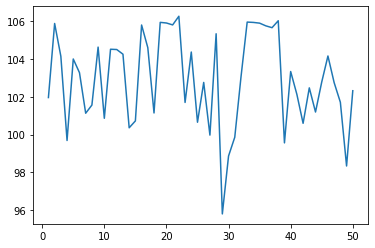

In [48]:
e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(569):
        o = O(scaled_df.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

test and train data

In [49]:
# train
# test
n_learning = train.shape[0]
print(n_learning)

455


##Training with "train" Data

epoch_1 - input_1: 0.49997190349588766
epoch_1 - input_2: 0.9999719007798522
epoch_1 - input_3: 1.4999713796594487
epoch_1 - input_4: 1.999971347617921
epoch_1 - input_5: 2.2750678738137493
epoch_1 - input_6: 2.7750676900764732
epoch_1 - input_7: 3.2750456789642834
epoch_1 - input_8: 3.772858463500884
epoch_1 - input_9: 4.26568457562134
epoch_1 - input_10: 4.765617098223277
epoch_1 - input_11: 5.265262492745636
epoch_1 - input_12: 5.765262137709149
epoch_1 - input_13: 6.264111282472994
epoch_1 - input_14: 6.764108705057127
epoch_1 - input_15: 7.249834187180277
epoch_1 - input_16: 7.749834097814235
epoch_1 - input_17: 8.234656190175315
epoch_1 - input_18: 8.727446677059648
epoch_1 - input_19: 9.20800631960512
epoch_1 - input_20: 9.227337930323644
epoch_1 - input_21: 9.227340172782332
epoch_1 - input_22: 9.227439746464102
epoch_1 - input_23: 9.727075267371445
epoch_1 - input_24: 10.222799859818165
epoch_1 - input_25: 10.710578727807004
epoch_1 - input_26: 11.20911146098232
epoch_1 - inpu

epoch_4 - input_283: 72.2901224061736
epoch_4 - input_284: 72.79010561968128
epoch_4 - input_285: 72.79010561968768
epoch_4 - input_286: 72.79010561968768
epoch_4 - input_287: 72.79010574924976
epoch_4 - input_288: 72.7901057504706
epoch_4 - input_289: 72.79010575047064
epoch_4 - input_290: 72.79012710115515
epoch_4 - input_291: 72.79013469180879
epoch_4 - input_292: 72.79013469180879
epoch_4 - input_293: 72.79014603835249
epoch_4 - input_294: 72.79032055911193
epoch_4 - input_295: 72.79032083608553
epoch_4 - input_296: 72.79032084263952
epoch_4 - input_297: 72.79032768680503
epoch_4 - input_298: 73.29029725406401
epoch_4 - input_299: 73.2902993572669
epoch_4 - input_300: 73.29029936128079
epoch_4 - input_301: 73.78819584852465
epoch_4 - input_302: 73.78819584852465
epoch_4 - input_303: 74.2722198706164
epoch_4 - input_304: 74.27324200765098
epoch_4 - input_305: 74.27324200765098
epoch_4 - input_306: 74.27324236225849
epoch_4 - input_307: 74.27324236536977
epoch_4 - input_308: 74.27324

epoch_11 - input_306: 74.7419912521729
epoch_11 - input_307: 74.74199125274849
epoch_11 - input_308: 74.74199125274849
epoch_11 - input_309: 74.74199125745592
epoch_11 - input_310: 74.74199125745592
epoch_11 - input_311: 74.74199831439267
epoch_11 - input_312: 74.74199831439267
epoch_11 - input_313: 74.74199842681952
epoch_11 - input_314: 74.74199843793512
epoch_11 - input_315: 74.74199847357058
epoch_11 - input_316: 74.74406564252679
epoch_11 - input_317: 74.74406566431048
epoch_11 - input_318: 75.24406560912351
epoch_11 - input_319: 75.24410391397232
epoch_11 - input_320: 75.24410406182696
epoch_11 - input_321: 75.24410406182696
epoch_11 - input_322: 75.74410399032776
epoch_11 - input_323: 75.74410399032776
epoch_11 - input_324: 76.24128926968696
epoch_11 - input_325: 76.24128928742657
epoch_11 - input_326: 76.2412892874268
epoch_11 - input_327: 76.2412897189493
epoch_11 - input_328: 76.2412897189493
epoch_11 - input_329: 76.74098233975465
epoch_11 - input_330: 77.2409742091906
epoch

epoch_22 - input_62: 20.88797884958957
epoch_22 - input_63: 21.387970517305533
epoch_22 - input_64: 21.530493028168095
epoch_22 - input_65: 22.027507326304594
epoch_22 - input_66: 22.527098258339844
epoch_22 - input_67: 22.52709825834011
epoch_22 - input_68: 22.527101141433345
epoch_22 - input_69: 22.52710116191115
epoch_22 - input_70: 22.52710121778356
epoch_22 - input_71: 23.027073217683206
epoch_22 - input_72: 23.027073218218796
epoch_22 - input_73: 23.523095430597674
epoch_22 - input_74: 23.84021757779063
epoch_22 - input_75: 23.840217577814457
epoch_22 - input_76: 24.18872116958588
epoch_22 - input_77: 24.18872116994513
epoch_22 - input_78: 24.37666847477769
epoch_22 - input_79: 24.876668474763573
epoch_22 - input_80: 24.876668474763573
epoch_22 - input_81: 24.884383769632304
epoch_22 - input_82: 24.884438662121863
epoch_22 - input_83: 25.384438662115553
epoch_22 - input_84: 25.884005439614313
epoch_22 - input_85: 25.884005462018976
epoch_22 - input_86: 26.38399438846259
epoch_22 

epoch_25 - input_435: 87.05272462839588
epoch_25 - input_436: 87.54907308588446
epoch_25 - input_437: 87.5649457675708
epoch_25 - input_438: 87.57327024918702
epoch_25 - input_439: 87.57327024925742
epoch_25 - input_440: 87.57358103615769
epoch_25 - input_441: 87.57358114183948
epoch_25 - input_442: 88.06921427598988
epoch_25 - input_443: 88.06956437379793
epoch_25 - input_444: 88.08018692012803
epoch_25 - input_445: 88.3898105767945
epoch_25 - input_446: 88.39511677461884
epoch_25 - input_447: 88.8937913272606
epoch_25 - input_448: 88.89379132737027
epoch_25 - input_449: 88.89379691606734
epoch_25 - input_450: 89.17202435743879
epoch_25 - input_451: 90.5610074163832
epoch_25 - input_452: 91.05507185203628
epoch_25 - input_453: 91.06401667792296
epoch_25 - input_454: 91.06401667792296
epoch_25 - input_455: 91.06401667792296
epoch_26 - input_1: 0.4999987986014341
epoch_26 - input_2: 0.9999987826677077
epoch_26 - input_3: 1.4999984568611286
epoch_26 - input_4: 1.9999983500349248
epoch_26

epoch_27 - input_416: 86.27707520913789
epoch_27 - input_417: 86.27707520913796
epoch_27 - input_418: 86.73103124097982
epoch_27 - input_419: 86.73103124098007
epoch_27 - input_420: 86.73103124099279
epoch_27 - input_421: 86.7310312452996
epoch_27 - input_422: 86.7310401072737
epoch_27 - input_423: 86.73104010727415
epoch_27 - input_424: 86.73104030763244
epoch_27 - input_425: 86.73104037832057
epoch_27 - input_426: 86.73104037832084
epoch_27 - input_427: 86.73104102651591
epoch_27 - input_428: 86.73104119448385
epoch_27 - input_429: 86.73104533427514
epoch_27 - input_430: 86.73104533445128
epoch_27 - input_431: 87.17325828340617
epoch_27 - input_432: 87.17325828367758
epoch_27 - input_433: 87.67325828319582
epoch_27 - input_434: 88.17324114416388
epoch_27 - input_435: 88.17324531299045
epoch_27 - input_436: 88.67304986605326
epoch_27 - input_437: 88.67306088158817
epoch_27 - input_438: 88.67308687659033
epoch_27 - input_439: 88.67308687659033
epoch_27 - input_440: 88.67308709851649
ep

epoch_30 - input_118: 34.40009946792411
epoch_30 - input_119: 34.900086685834026
epoch_30 - input_120: 35.400021052419
epoch_30 - input_121: 35.400021074846784
epoch_30 - input_122: 35.900021074841405
epoch_30 - input_123: 36.40000040946576
epoch_30 - input_124: 36.40000040946576
epoch_30 - input_125: 36.40000040951311
epoch_30 - input_126: 36.40000041132345
epoch_30 - input_127: 36.90000041121617
epoch_30 - input_128: 37.40000041086788
epoch_30 - input_129: 37.40000041086788
epoch_30 - input_130: 37.90000039887007
epoch_30 - input_131: 37.90000039887007
epoch_30 - input_132: 38.39999084905846
epoch_30 - input_133: 38.8987456441068
epoch_30 - input_134: 38.89874564411391
epoch_30 - input_135: 39.39872884206939
epoch_30 - input_136: 39.898726506887144
epoch_30 - input_137: 39.89872650689301
epoch_30 - input_138: 39.89872650689301
epoch_30 - input_139: 40.39872646735376
epoch_30 - input_140: 40.398726468156795
epoch_30 - input_141: 40.39872646815791
epoch_30 - input_142: 40.8986954555537

epoch_32 - input_382: 84.38957105853936
epoch_32 - input_383: 84.38957704936276
epoch_32 - input_384: 84.38957706122277
epoch_32 - input_385: 84.3896095930318
epoch_32 - input_386: 84.88960780463583
epoch_32 - input_387: 84.88960780477902
epoch_32 - input_388: 84.88961108266194
epoch_32 - input_389: 84.88961108302185
epoch_32 - input_390: 85.38957326391036
epoch_32 - input_391: 85.38960368023453
epoch_32 - input_392: 85.38984274972668
epoch_32 - input_393: 85.88981971817626
epoch_32 - input_394: 86.31412244432254
epoch_32 - input_395: 86.31412325475814
epoch_32 - input_396: 86.31412325475864
epoch_32 - input_397: 86.31562976223351
epoch_32 - input_398: 86.31562976227266
epoch_32 - input_399: 86.31562976287951
epoch_32 - input_400: 86.31562977137509
epoch_32 - input_401: 86.81562136630326
epoch_32 - input_402: 86.81562192057507
epoch_32 - input_403: 86.81562192057508
epoch_32 - input_404: 86.81562208065212
epoch_32 - input_405: 86.81579472565728
epoch_32 - input_406: 86.81579472568174
e

epoch_34 - input_190: 42.75991786660278
epoch_34 - input_191: 43.259917629593
epoch_34 - input_192: 43.2599176295933
epoch_34 - input_193: 43.28279437317232
epoch_34 - input_194: 43.78279436683449
epoch_34 - input_195: 44.28182934834317
epoch_34 - input_196: 44.28182934834376
epoch_34 - input_197: 44.781829348324585
epoch_34 - input_198: 45.281829348046514
epoch_34 - input_199: 45.778850702036316
epoch_34 - input_200: 46.27885069019726
epoch_34 - input_201: 46.278850690319935
epoch_34 - input_202: 46.77885069016067
epoch_34 - input_203: 47.27617253481876
epoch_34 - input_204: 47.77617252676131
epoch_34 - input_205: 47.77617252676517
epoch_34 - input_206: 48.16480789909641
epoch_34 - input_207: 48.16480789909666
epoch_34 - input_208: 48.6647933721761
epoch_34 - input_209: 48.66479592000279
epoch_34 - input_210: 48.6647959223144
epoch_34 - input_211: 49.16478647629356
epoch_34 - input_212: 49.164786476293564
epoch_34 - input_213: 49.664786078104555
epoch_34 - input_214: 50.15804166409687

epoch_39 - input_347: 75.0937089629589
epoch_39 - input_348: 75.0937089629589
epoch_39 - input_349: 75.0937089629589
epoch_39 - input_350: 75.0937089629589
epoch_39 - input_351: 75.09370896295991
epoch_39 - input_352: 75.58860118994512
epoch_39 - input_353: 76.08789958425167
epoch_39 - input_354: 76.58789958425167
epoch_39 - input_355: 76.58789958426117
epoch_39 - input_356: 76.58790018046582
epoch_39 - input_357: 76.58790141695202
epoch_39 - input_358: 76.58790141900201
epoch_39 - input_359: 76.58790141900202
epoch_39 - input_360: 76.58790141900202
epoch_39 - input_361: 76.58790141900211
epoch_39 - input_362: 76.58790141900211
epoch_39 - input_363: 76.58790141900211
epoch_39 - input_364: 76.58790156530512
epoch_39 - input_365: 76.58790156530512
epoch_39 - input_366: 77.08790156528791
epoch_39 - input_367: 77.58789488441192
epoch_39 - input_368: 77.58789491445553
epoch_39 - input_369: 78.08789376695351
epoch_39 - input_370: 78.5878935565157
epoch_39 - input_371: 79.08789355635164
epoch

epoch_42 - input_255: 58.65629988956896
epoch_42 - input_256: 59.10085160905015
epoch_42 - input_257: 59.45691457390436
epoch_42 - input_258: 59.9565324716944
epoch_42 - input_259: 60.09041344596706
epoch_42 - input_260: 60.58677664244549
epoch_42 - input_261: 60.6829265598782
epoch_42 - input_262: 61.009807022949396
epoch_42 - input_263: 61.50980690817146
epoch_42 - input_264: 62.009803219201586
epoch_42 - input_265: 62.50979950378589
epoch_42 - input_266: 62.972850722053266
epoch_42 - input_267: 62.97285324963459
epoch_42 - input_268: 62.972853249634596
epoch_42 - input_269: 62.972853249634596
epoch_42 - input_270: 62.9748772609641
epoch_42 - input_271: 62.97606626198036
epoch_42 - input_272: 62.98170437532757
epoch_42 - input_273: 63.474960971835074
epoch_42 - input_274: 63.54678734152252
epoch_42 - input_275: 64.02186228866321
epoch_42 - input_276: 64.02187320364982
epoch_42 - input_277: 64.02187320366835
epoch_42 - input_278: 64.52181043084668
epoch_42 - input_279: 64.550814713514

epoch_47 - input_234: 56.303904441999364
epoch_47 - input_235: 56.30390444200906
epoch_47 - input_236: 56.30404034942868
epoch_47 - input_237: 56.80404034770877
epoch_47 - input_238: 57.09501647386141
epoch_47 - input_239: 57.09501647386141
epoch_47 - input_240: 57.344760168824365
epoch_47 - input_241: 57.435134899556125
epoch_47 - input_242: 57.4353811288356
epoch_47 - input_243: 57.43538161322087
epoch_47 - input_244: 57.47383175770785
epoch_47 - input_245: 57.93891904310552
epoch_47 - input_246: 57.93892122088141
epoch_47 - input_247: 57.97507973880292
epoch_47 - input_248: 57.97510328907838
epoch_47 - input_249: 57.97510510305395
epoch_47 - input_250: 57.97510510305395
epoch_47 - input_251: 58.47510510304942
epoch_47 - input_252: 58.47510510304992
epoch_47 - input_253: 58.9750909664004
epoch_47 - input_254: 59.47509047721411
epoch_47 - input_255: 59.9677099750543
epoch_47 - input_256: 60.25486240269258
epoch_47 - input_257: 60.2749182287479
epoch_47 - input_258: 60.7633779971799
ep

epoch_50 - input_359: 76.9245274708896
epoch_50 - input_360: 76.92452747088974
epoch_50 - input_361: 76.9245274795735
epoch_50 - input_362: 76.92452747957361
epoch_50 - input_363: 76.92452747957361
epoch_50 - input_364: 76.92455609502143
epoch_50 - input_365: 76.92455609502618
epoch_50 - input_366: 77.42455607162785
epoch_50 - input_367: 77.91747687864114
epoch_50 - input_368: 78.80683351362617
epoch_50 - input_369: 79.30683350909239
epoch_50 - input_370: 79.80683350898389
epoch_50 - input_371: 80.30683350898377
epoch_50 - input_372: 80.30683351425137
epoch_50 - input_373: 80.80420540609504
epoch_50 - input_374: 81.30418444553399
epoch_50 - input_375: 81.30418444553399
epoch_50 - input_376: 81.30418444727127
epoch_50 - input_377: 81.30418444727127
epoch_50 - input_378: 81.30418444727223
epoch_50 - input_379: 81.30418444727223
epoch_50 - input_380: 81.80418392987877
epoch_50 - input_381: 81.80418392995985
epoch_50 - input_382: 81.80418393008308
epoch_50 - input_383: 81.80418393011715
ep

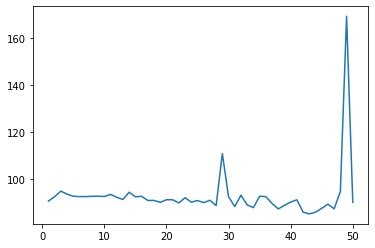

In [50]:
# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(scaled_df.iloc[i], w, 'sigmoid')
#         w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E)

# plt.plot(iteration, e_lst_test)


##Adding bias


**Problem: If we don't shuffle the dataset, the Error is lower than when, the dataset is shuffled**

In [51]:
df_bias = scaled_df
df_bias["bias"] = -1
# df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
w_bias = Rand(df_bias.shape[1])
n_learning = df_bias.shape[0]
n_learning
# w_bias.shape
# df_bias.shape
# df_bias

569

## Training complete dataset with bias

epoch_1 - input_1: 0.5
epoch_1 - input_2: 1.0
epoch_1 - input_3: 1.5
epoch_1 - input_4: 2.0
epoch_1 - input_5: 2.5
epoch_1 - input_6: 3.0
epoch_1 - input_7: 3.5
epoch_1 - input_8: 4.0
epoch_1 - input_9: 4.5
epoch_1 - input_10: 5.0
epoch_1 - input_11: 5.5
epoch_1 - input_12: 6.0
epoch_1 - input_13: 6.5
epoch_1 - input_14: 7.0
epoch_1 - input_15: 7.5
epoch_1 - input_16: 8.0
epoch_1 - input_17: 8.5
epoch_1 - input_18: 9.0
epoch_1 - input_19: 9.5
epoch_1 - input_20: 9.5
epoch_1 - input_21: 9.5
epoch_1 - input_22: 9.5
epoch_1 - input_23: 10.0
epoch_1 - input_24: 10.5
epoch_1 - input_25: 11.0
epoch_1 - input_26: 11.5
epoch_1 - input_27: 12.0
epoch_1 - input_28: 12.5
epoch_1 - input_29: 13.0
epoch_1 - input_30: 13.5
epoch_1 - input_31: 14.0
epoch_1 - input_32: 14.5
epoch_1 - input_33: 15.0
epoch_1 - input_34: 15.5
epoch_1 - input_35: 16.0
epoch_1 - input_36: 16.5
epoch_1 - input_37: 17.0
epoch_1 - input_38: 17.0
epoch_1 - input_39: 17.5
epoch_1 - input_40: 18.0
epoch_1 - input_41: 18.5
epoch_

epoch_2 - input_440: nan
epoch_2 - input_441: nan
epoch_2 - input_442: nan
epoch_2 - input_443: nan
epoch_2 - input_444: nan
epoch_2 - input_445: nan
epoch_2 - input_446: nan
epoch_2 - input_447: nan
epoch_2 - input_448: nan
epoch_2 - input_449: nan
epoch_2 - input_450: nan
epoch_2 - input_451: nan
epoch_2 - input_452: nan
epoch_2 - input_453: nan
epoch_2 - input_454: nan
epoch_2 - input_455: nan
epoch_2 - input_456: nan
epoch_2 - input_457: nan
epoch_2 - input_458: nan
epoch_2 - input_459: nan
epoch_2 - input_460: nan
epoch_2 - input_461: nan
epoch_2 - input_462: nan
epoch_2 - input_463: nan
epoch_2 - input_464: nan
epoch_2 - input_465: nan
epoch_2 - input_466: nan
epoch_2 - input_467: nan
epoch_2 - input_468: nan
epoch_2 - input_469: nan
epoch_2 - input_470: nan
epoch_2 - input_471: nan
epoch_2 - input_472: nan
epoch_2 - input_473: nan
epoch_2 - input_474: nan
epoch_2 - input_475: nan
epoch_2 - input_476: nan
epoch_2 - input_477: nan
epoch_2 - input_478: nan
epoch_2 - input_479: nan


epoch_16 - input_502: nan
epoch_16 - input_503: nan
epoch_16 - input_504: nan
epoch_16 - input_505: nan
epoch_16 - input_506: nan
epoch_16 - input_507: nan
epoch_16 - input_508: nan
epoch_16 - input_509: nan
epoch_16 - input_510: nan
epoch_16 - input_511: nan
epoch_16 - input_512: nan
epoch_16 - input_513: nan
epoch_16 - input_514: nan
epoch_16 - input_515: nan
epoch_16 - input_516: nan
epoch_16 - input_517: nan
epoch_16 - input_518: nan
epoch_16 - input_519: nan
epoch_16 - input_520: nan
epoch_16 - input_521: nan
epoch_16 - input_522: nan
epoch_16 - input_523: nan
epoch_16 - input_524: nan
epoch_16 - input_525: nan
epoch_16 - input_526: nan
epoch_16 - input_527: nan
epoch_16 - input_528: nan
epoch_16 - input_529: nan
epoch_16 - input_530: nan
epoch_16 - input_531: nan
epoch_16 - input_532: nan
epoch_16 - input_533: nan
epoch_16 - input_534: nan
epoch_16 - input_535: nan
epoch_16 - input_536: nan
epoch_16 - input_537: nan
epoch_16 - input_538: nan
epoch_16 - input_539: nan
epoch_16 - i

epoch_18 - input_6: nan
epoch_18 - input_7: nan
epoch_18 - input_8: nan
epoch_18 - input_9: nan
epoch_18 - input_10: nan
epoch_18 - input_11: nan
epoch_18 - input_12: nan
epoch_18 - input_13: nan
epoch_18 - input_14: nan
epoch_18 - input_15: nan
epoch_18 - input_16: nan
epoch_18 - input_17: nan
epoch_18 - input_18: nan
epoch_18 - input_19: nan
epoch_18 - input_20: nan
epoch_18 - input_21: nan
epoch_18 - input_22: nan
epoch_18 - input_23: nan
epoch_18 - input_24: nan
epoch_18 - input_25: nan
epoch_18 - input_26: nan
epoch_18 - input_27: nan
epoch_18 - input_28: nan
epoch_18 - input_29: nan
epoch_18 - input_30: nan
epoch_18 - input_31: nan
epoch_18 - input_32: nan
epoch_18 - input_33: nan
epoch_18 - input_34: nan
epoch_18 - input_35: nan
epoch_18 - input_36: nan
epoch_18 - input_37: nan
epoch_18 - input_38: nan
epoch_18 - input_39: nan
epoch_18 - input_40: nan
epoch_18 - input_41: nan
epoch_18 - input_42: nan
epoch_18 - input_43: nan
epoch_18 - input_44: nan
epoch_18 - input_45: nan
epoc

epoch_23 - input_408: nan
epoch_23 - input_409: nan
epoch_23 - input_410: nan
epoch_23 - input_411: nan
epoch_23 - input_412: nan
epoch_23 - input_413: nan
epoch_23 - input_414: nan
epoch_23 - input_415: nan
epoch_23 - input_416: nan
epoch_23 - input_417: nan
epoch_23 - input_418: nan
epoch_23 - input_419: nan
epoch_23 - input_420: nan
epoch_23 - input_421: nan
epoch_23 - input_422: nan
epoch_23 - input_423: nan
epoch_23 - input_424: nan
epoch_23 - input_425: nan
epoch_23 - input_426: nan
epoch_23 - input_427: nan
epoch_23 - input_428: nan
epoch_23 - input_429: nan
epoch_23 - input_430: nan
epoch_23 - input_431: nan
epoch_23 - input_432: nan
epoch_23 - input_433: nan
epoch_23 - input_434: nan
epoch_23 - input_435: nan
epoch_23 - input_436: nan
epoch_23 - input_437: nan
epoch_23 - input_438: nan
epoch_23 - input_439: nan
epoch_23 - input_440: nan
epoch_23 - input_441: nan
epoch_23 - input_442: nan
epoch_23 - input_443: nan
epoch_23 - input_444: nan
epoch_23 - input_445: nan
epoch_23 - i

epoch_27 - input_5: nan
epoch_27 - input_6: nan
epoch_27 - input_7: nan
epoch_27 - input_8: nan
epoch_27 - input_9: nan
epoch_27 - input_10: nan
epoch_27 - input_11: nan
epoch_27 - input_12: nan
epoch_27 - input_13: nan
epoch_27 - input_14: nan
epoch_27 - input_15: nan
epoch_27 - input_16: nan
epoch_27 - input_17: nan
epoch_27 - input_18: nan
epoch_27 - input_19: nan
epoch_27 - input_20: nan
epoch_27 - input_21: nan
epoch_27 - input_22: nan
epoch_27 - input_23: nan
epoch_27 - input_24: nan
epoch_27 - input_25: nan
epoch_27 - input_26: nan
epoch_27 - input_27: nan
epoch_27 - input_28: nan
epoch_27 - input_29: nan
epoch_27 - input_30: nan
epoch_27 - input_31: nan
epoch_27 - input_32: nan
epoch_27 - input_33: nan
epoch_27 - input_34: nan
epoch_27 - input_35: nan
epoch_27 - input_36: nan
epoch_27 - input_37: nan
epoch_27 - input_38: nan
epoch_27 - input_39: nan
epoch_27 - input_40: nan
epoch_27 - input_41: nan
epoch_27 - input_42: nan
epoch_27 - input_43: nan
epoch_27 - input_44: nan
epoch

epoch_30 - input_456: nan
epoch_30 - input_457: nan
epoch_30 - input_458: nan
epoch_30 - input_459: nan
epoch_30 - input_460: nan
epoch_30 - input_461: nan
epoch_30 - input_462: nan
epoch_30 - input_463: nan
epoch_30 - input_464: nan
epoch_30 - input_465: nan
epoch_30 - input_466: nan
epoch_30 - input_467: nan
epoch_30 - input_468: nan
epoch_30 - input_469: nan
epoch_30 - input_470: nan
epoch_30 - input_471: nan
epoch_30 - input_472: nan
epoch_30 - input_473: nan
epoch_30 - input_474: nan
epoch_30 - input_475: nan
epoch_30 - input_476: nan
epoch_30 - input_477: nan
epoch_30 - input_478: nan
epoch_30 - input_479: nan
epoch_30 - input_480: nan
epoch_30 - input_481: nan
epoch_30 - input_482: nan
epoch_30 - input_483: nan
epoch_30 - input_484: nan
epoch_30 - input_485: nan
epoch_30 - input_486: nan
epoch_30 - input_487: nan
epoch_30 - input_488: nan
epoch_30 - input_489: nan
epoch_30 - input_490: nan
epoch_30 - input_491: nan
epoch_30 - input_492: nan
epoch_30 - input_493: nan
epoch_30 - i

epoch_36 - input_538: nan
epoch_36 - input_539: nan
epoch_36 - input_540: nan
epoch_36 - input_541: nan
epoch_36 - input_542: nan
epoch_36 - input_543: nan
epoch_36 - input_544: nan
epoch_36 - input_545: nan
epoch_36 - input_546: nan
epoch_36 - input_547: nan
epoch_36 - input_548: nan
epoch_36 - input_549: nan
epoch_36 - input_550: nan
epoch_36 - input_551: nan
epoch_36 - input_552: nan
epoch_36 - input_553: nan
epoch_36 - input_554: nan
epoch_36 - input_555: nan
epoch_36 - input_556: nan
epoch_36 - input_557: nan
epoch_36 - input_558: nan
epoch_36 - input_559: nan
epoch_36 - input_560: nan
epoch_36 - input_561: nan
epoch_36 - input_562: nan
epoch_36 - input_563: nan
epoch_36 - input_564: nan
epoch_36 - input_565: nan
epoch_36 - input_566: nan
epoch_36 - input_567: nan
epoch_36 - input_568: nan
epoch_36 - input_569: nan
epoch_37 - input_1: nan
epoch_37 - input_2: nan
epoch_37 - input_3: nan
epoch_37 - input_4: nan
epoch_37 - input_5: nan
epoch_37 - input_6: nan
epoch_37 - input_7: nan


epoch_38 - input_555: nan
epoch_38 - input_556: nan
epoch_38 - input_557: nan
epoch_38 - input_558: nan
epoch_38 - input_559: nan
epoch_38 - input_560: nan
epoch_38 - input_561: nan
epoch_38 - input_562: nan
epoch_38 - input_563: nan
epoch_38 - input_564: nan
epoch_38 - input_565: nan
epoch_38 - input_566: nan
epoch_38 - input_567: nan
epoch_38 - input_568: nan
epoch_38 - input_569: nan
epoch_39 - input_1: nan
epoch_39 - input_2: nan
epoch_39 - input_3: nan
epoch_39 - input_4: nan
epoch_39 - input_5: nan
epoch_39 - input_6: nan
epoch_39 - input_7: nan
epoch_39 - input_8: nan
epoch_39 - input_9: nan
epoch_39 - input_10: nan
epoch_39 - input_11: nan
epoch_39 - input_12: nan
epoch_39 - input_13: nan
epoch_39 - input_14: nan
epoch_39 - input_15: nan
epoch_39 - input_16: nan
epoch_39 - input_17: nan
epoch_39 - input_18: nan
epoch_39 - input_19: nan
epoch_39 - input_20: nan
epoch_39 - input_21: nan
epoch_39 - input_22: nan
epoch_39 - input_23: nan
epoch_39 - input_24: nan
epoch_39 - input_25

epoch_45 - input_177: nan
epoch_45 - input_178: nan
epoch_45 - input_179: nan
epoch_45 - input_180: nan
epoch_45 - input_181: nan
epoch_45 - input_182: nan
epoch_45 - input_183: nan
epoch_45 - input_184: nan
epoch_45 - input_185: nan
epoch_45 - input_186: nan
epoch_45 - input_187: nan
epoch_45 - input_188: nan
epoch_45 - input_189: nan
epoch_45 - input_190: nan
epoch_45 - input_191: nan
epoch_45 - input_192: nan
epoch_45 - input_193: nan
epoch_45 - input_194: nan
epoch_45 - input_195: nan
epoch_45 - input_196: nan
epoch_45 - input_197: nan
epoch_45 - input_198: nan
epoch_45 - input_199: nan
epoch_45 - input_200: nan
epoch_45 - input_201: nan
epoch_45 - input_202: nan
epoch_45 - input_203: nan
epoch_45 - input_204: nan
epoch_45 - input_205: nan
epoch_45 - input_206: nan
epoch_45 - input_207: nan
epoch_45 - input_208: nan
epoch_45 - input_209: nan
epoch_45 - input_210: nan
epoch_45 - input_211: nan
epoch_45 - input_212: nan
epoch_45 - input_213: nan
epoch_45 - input_214: nan
epoch_45 - i

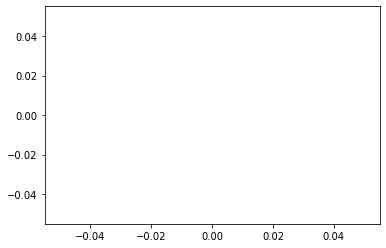

In [53]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(df_bias.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(df_bias.iloc[i], w_bias, 'sigmoid')
#         w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E / n_learning)

# plt.plot(iteration, e_lst_test)
# plt.xlabel('Epoch number ')
# # plt.grid()

### Train and test assignment for model with bias

In [54]:
df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
train = df_bias.sample(frac = 0.8).reset_index(drop=True)
test = df_bias.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()
n_learning = train.shape[0]

(455, 31) (114, 31)


##Training "train" datas with bias

epoch_1 - input_1: nan
epoch_1 - input_2: nan
epoch_1 - input_3: nan
epoch_1 - input_4: nan
epoch_1 - input_5: nan
epoch_1 - input_6: nan
epoch_1 - input_7: nan
epoch_1 - input_8: nan
epoch_1 - input_9: nan
epoch_1 - input_10: nan
epoch_1 - input_11: nan
epoch_1 - input_12: nan
epoch_1 - input_13: nan
epoch_1 - input_14: nan
epoch_1 - input_15: nan
epoch_1 - input_16: nan
epoch_1 - input_17: nan
epoch_1 - input_18: nan
epoch_1 - input_19: nan
epoch_1 - input_20: nan
epoch_1 - input_21: nan
epoch_1 - input_22: nan
epoch_1 - input_23: nan
epoch_1 - input_24: nan
epoch_1 - input_25: nan
epoch_1 - input_26: nan
epoch_1 - input_27: nan
epoch_1 - input_28: nan
epoch_1 - input_29: nan
epoch_1 - input_30: nan
epoch_1 - input_31: nan
epoch_1 - input_32: nan
epoch_1 - input_33: nan
epoch_1 - input_34: nan
epoch_1 - input_35: nan
epoch_1 - input_36: nan
epoch_1 - input_37: nan
epoch_1 - input_38: nan
epoch_1 - input_39: nan
epoch_1 - input_40: nan
epoch_1 - input_41: nan
epoch_1 - input_42: nan
e

epoch_30 - input_300: nan
epoch_30 - input_301: nan
epoch_30 - input_302: nan
epoch_30 - input_303: nan
epoch_30 - input_304: nan
epoch_30 - input_305: nan
epoch_30 - input_306: nan
epoch_30 - input_307: nan
epoch_30 - input_308: nan
epoch_30 - input_309: nan
epoch_30 - input_310: nan
epoch_30 - input_311: nan
epoch_30 - input_312: nan
epoch_30 - input_313: nan
epoch_30 - input_314: nan
epoch_30 - input_315: nan
epoch_30 - input_316: nan
epoch_30 - input_317: nan
epoch_30 - input_318: nan
epoch_30 - input_319: nan
epoch_30 - input_320: nan
epoch_30 - input_321: nan
epoch_30 - input_322: nan
epoch_30 - input_323: nan
epoch_30 - input_324: nan
epoch_30 - input_325: nan
epoch_30 - input_326: nan
epoch_30 - input_327: nan
epoch_30 - input_328: nan
epoch_30 - input_329: nan
epoch_30 - input_330: nan
epoch_30 - input_331: nan
epoch_30 - input_332: nan
epoch_30 - input_333: nan
epoch_30 - input_334: nan
epoch_30 - input_335: nan
epoch_30 - input_336: nan
epoch_30 - input_337: nan
epoch_30 - i

epoch_49 - input_78: nan
epoch_49 - input_79: nan
epoch_49 - input_80: nan
epoch_49 - input_81: nan
epoch_49 - input_82: nan
epoch_49 - input_83: nan
epoch_49 - input_84: nan
epoch_49 - input_85: nan
epoch_49 - input_86: nan
epoch_49 - input_87: nan
epoch_49 - input_88: nan
epoch_49 - input_89: nan
epoch_49 - input_90: nan
epoch_49 - input_91: nan
epoch_49 - input_92: nan
epoch_49 - input_93: nan
epoch_49 - input_94: nan
epoch_49 - input_95: nan
epoch_49 - input_96: nan
epoch_49 - input_97: nan
epoch_49 - input_98: nan
epoch_49 - input_99: nan
epoch_49 - input_100: nan
epoch_49 - input_101: nan
epoch_49 - input_102: nan
epoch_49 - input_103: nan
epoch_49 - input_104: nan
epoch_49 - input_105: nan
epoch_49 - input_106: nan
epoch_49 - input_107: nan
epoch_49 - input_108: nan
epoch_49 - input_109: nan
epoch_49 - input_110: nan
epoch_49 - input_111: nan
epoch_49 - input_112: nan
epoch_49 - input_113: nan
epoch_49 - input_114: nan
epoch_49 - input_115: nan
epoch_49 - input_116: nan
epoch_49

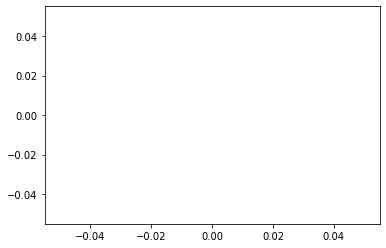

In [55]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(df_bias.iloc[i], w_bias, 'sigmoid')
#         w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E / n_learning)

# plt.plot(iteration, e_lst_test)
# plt.xlabel('Epoch number ')
# # plt.grid()